In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [22]:

df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx')
df.head()


,River,W,S,Q,U,H,D50,D84,R,qs
0,Bogardi1,0.300,0.0104,0.02747,1.06,0.087,0.0068,0.00816,0.0721,24.1
1,Bogardi1,0.300,0.0141,0.01566,0.92,0.057,0.0068,0.00816,0.0504,6.1
2,Bogardi1,0.823,0.0143,0.02288,0.69,0.040,0.0068,0.00816,0.0389,0.2
3,Bogardi1,0.823,0.0145,0.04978,0.82,0.074,0.0068,0.00816,0.0709,21.9
4,Bogardi1,0.823,0.0153,0.03582,0.78,0.056,0.0068,0.00816,0.0535,1.8


In [23]:
X=df.loc[:, ['D84','D50','H','U','W']].values
y=df.loc[:, [ 'qs']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train=y_train.ravel()
y_test=y_test.ravel()


In [24]:
np.shape(y_test)

(264,)

In [25]:
W=X_test[:,4]
D90=X_test[:,0]
D50=X_test[:,1]
h=X_test[:,2]
U=X_test[:,3 ]
qsb=y_test


In [26]:
import math
rhos = 2650    
rho = 1000
g=9.81
def calculate_sediment_bed_load(D90, D50, h, U,W):
    D90=D90
    D50=D50
    r = 3 * D90
    C = 18 * math.log10(12 * h / r)
    C90 = 18 * math.log10(12 * h / D90)
    mu = (C / C90) ** (3 / 2)
    delta = (rhos - rho) / rho
    tac = rho * g * U ** 2 / C ** 2
    qsb = 5 * D50 * U / C * math.sqrt(g) * math.exp(-0.27 * delta * D50 * rho * g / (mu * tac)) # sediment bed load
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [27]:
qsb_pred=np.zeros([len(D90),1])
for i in range(len(D90)):
    qsb_pred[i]=calculate_sediment_bed_load(D90[i], D50[i], h[i], U[i],W[i])

In [28]:
y_pred=qsb_pred

In [29]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('MSE:', mse)

mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)
print('RMSE:', rmse)

r_squared = r2_score(y_test, y_pred)

print('R-squared:', r_squared)


MSE: 54937692.364889465
RMSE: 7411.996516788811
R-squared: 0.6126474527514241
Mean Absolute Error: 1877.5992207981017


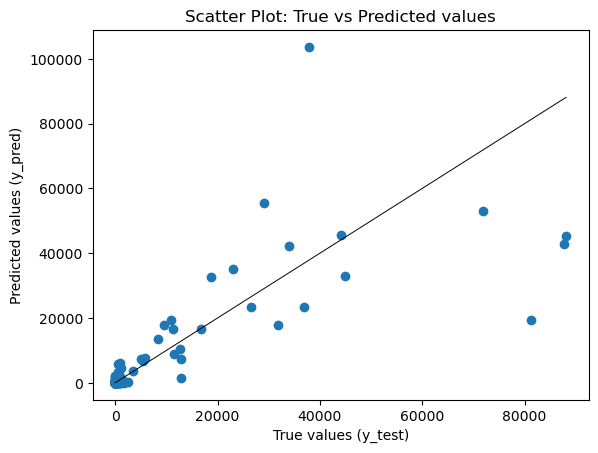

In [30]:
# Scatter plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linewidth=0.7)
plt.xlabel('True values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Scatter Plot: True vs Predicted values')
plt.show()